<a href="https://colab.research.google.com/github/silvaniacorreia/mackenzie/blob/main/Pacotes_com_mais_custos_no_LM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pacotes com mais custos no Last Mile 📦**

**Premissas:**
<br><br>
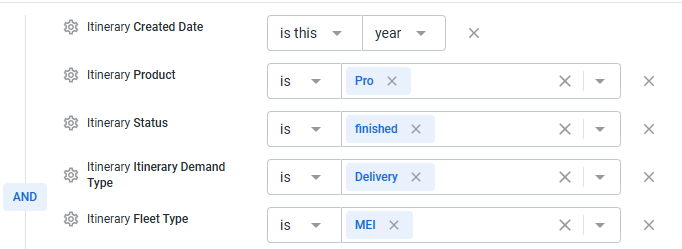
<br><br>
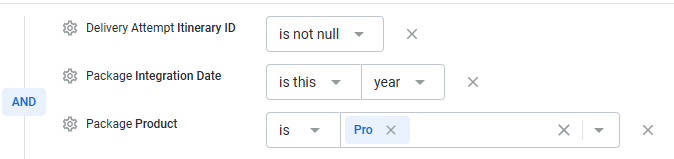

### **Carregando Dados**

In [26]:
# @title
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")

drive.mount('/content/drive')

import pandas as pd

df_pacotes_interesse = pd.read_csv('/content/drive/MyDrive/Pacotes com mais custos no LM/versao2/tentativas-entrega-2025.csv')
df_itinerarios_interesse = pd.read_csv('/content/drive/MyDrive/Pacotes com mais custos no LM/versao2/itinerarios-alvo-2025.csv')
pacotes_embarcador = pd.read_csv('/content/drive/MyDrive/Pacotes com mais custos no LM/versao2/clientes-pacotes-2025.csv')
pacotes_base = pd.read_csv('/content/drive/MyDrive/Pacotes com mais custos no LM/versao2/bases-pacotes-2025.csv')
receita_pacotes = pd.read_csv('/content/drive/MyDrive/Pacotes com mais custos no LM/versao2/receita-pacotes-2025.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# @title
# renomear colunas dos dataframes

df_itinerarios_interesse.rename(columns={'Itinerary R$ Driver Payments': 'custo itinerario', 'Itinerary Packages': 'numero pacotes', 'Itinerary ID': 'itinerary id'}, inplace=True)
df_pacotes_interesse.rename(columns={'Delivery Attempt Itinerary ID': 'itinerary id', 'Delivery Attempt Number': 'numero da tentativa', 'Delivery Attempt Status': 'status da tentativa', 'Package ID': 'package id'}, inplace=True)
print(df_itinerarios_interesse.columns)
print(df_pacotes_interesse.columns)

# mergeando dataframes

df_itinerarios_pacotes = pd.merge(df_pacotes_interesse, df_itinerarios_interesse, on='itinerary id')

# selecionar package ids que possuem mais de um itinerary id, ou seja, possuíram mais de uma tentativa de entrega
packages_id = df_itinerarios_pacotes.groupby('package id').filter(lambda x: len(x) > 1)['package id'].unique()
df_itinerarios_pacotes = df_itinerarios_pacotes[df_itinerarios_pacotes['package id'].isin(packages_id)]
df_itinerarios_pacotes

Index(['itinerary id', 'custo itinerario', 'numero pacotes'], dtype='object')
Index(['itinerary id', 'numero da tentativa', 'status da tentativa',
       'package id'],
      dtype='object')


,itinerary id,numero da tentativa,status da tentativa,package id,custo itinerario,numero pacotes
24,69791431,1,Destinatário ausente,445870410,R$166.33,88.0
25,69791431,1,Destinatário ausente,445825537,R$166.33,88.0
37,69791440,1,Destinatário ausente,445948379,R$196.76,87.0
105,69791455,2,Destinatário ausente,446061988,R$254.84,48.0
109,69791455,1,Destinatário ausente,445838822,R$254.84,48.0
...,...,...,...,...,...,...
3272698,70190171,3,Realizado com sucesso,453981586,R$113.94,18.0
3272699,70190171,3,Realizado com sucesso,453760314,R$113.94,18.0
3272704,70190171,3,Realizado com sucesso,453838444,R$113.94,18.0
3272706,70190171,4,Realizado com sucesso,453607507,R$113.94,18.0


In [3]:
# @title
df_itinerarios_pacotes['custo itinerario'] = df_itinerarios_pacotes['custo itinerario'].str.replace('R$', '', regex=False)
df_itinerarios_pacotes['custo itinerario'] = df_itinerarios_pacotes['custo itinerario'].astype(float)

df_itinerarios_pacotes['preco pacote'] = df_itinerarios_pacotes['custo itinerario'] / df_itinerarios_pacotes['numero pacotes']
df_itinerarios_pacotes

,itinerary id,numero da tentativa,status da tentativa,package id,custo itinerario,numero pacotes,preco pacote
24,69791431,1,Destinatário ausente,445870410,166.33,88.0,1.890114
25,69791431,1,Destinatário ausente,445825537,166.33,88.0,1.890114
37,69791440,1,Destinatário ausente,445948379,196.76,87.0,2.261609
105,69791455,2,Destinatário ausente,446061988,254.84,48.0,5.309167
109,69791455,1,Destinatário ausente,445838822,254.84,48.0,5.309167
...,...,...,...,...,...,...,...
3272698,70190171,3,Realizado com sucesso,453981586,113.94,18.0,6.330000
3272699,70190171,3,Realizado com sucesso,453760314,113.94,18.0,6.330000
3272704,70190171,3,Realizado com sucesso,453838444,113.94,18.0,6.330000
3272706,70190171,4,Realizado com sucesso,453607507,113.94,18.0,6.330000


## **Análises**

In [4]:
# @title
# contar itinerários distintitos, pacotes distintos, média de itinerários por pacote, pacotes com mais itinerários e com menos itinerarios
itinerarios_distintos = df_itinerarios_pacotes['itinerary id'].nunique()
pacotes_distintos = df_itinerarios_pacotes['package id'].nunique()
itinerarios_por_pacote = df_itinerarios_pacotes.groupby('package id')['itinerary id'].count().mean()
# mediana de itinerarios por pacote
itinerarios_por_pacote_mediana = df_itinerarios_pacotes.groupby('package id')['itinerary id'].count().median()
pacotes_mais_itinerarios = df_itinerarios_pacotes.groupby('package id')['itinerary id'].count().max()
pacotes_menos_itinerarios = df_itinerarios_pacotes.groupby('package id')['itinerary id'].count().min()

print(f'Quantidade de itinerários distintos com insucessos: {itinerarios_distintos}')
print(f'Quantidade de pacotes distintos com insucessos: {pacotes_distintos}')
print(f'Média de tentativas por pacote com insucesso: {itinerarios_por_pacote}')
print(f'Mediana de tentativas por pacote com insucesso: {itinerarios_por_pacote_mediana}')
print(f'Pacote com mais itinerários (tentativas de entrega): \n{pacotes_mais_itinerarios}')
print(f'Pacote com menos itinerários (tentativas de entrega): \n{pacotes_menos_itinerarios}')

Quantidade de itinerários distintos com insucessos: 35215
Quantidade de pacotes distintos com insucessos: 77487
Média de tentativas por pacote com insucesso: 2.1866893801540903
Mediana de tentativas por pacote com insucesso: 2.0
Pacote com mais itinerários (tentativas de entrega): 
9
Pacote com menos itinerários (tentativas de entrega): 
2


Total de pacotes únicos com primeira tentativa ausente: 30128
Total de pacotes únicos com primeira tentativa em outros status: 47317


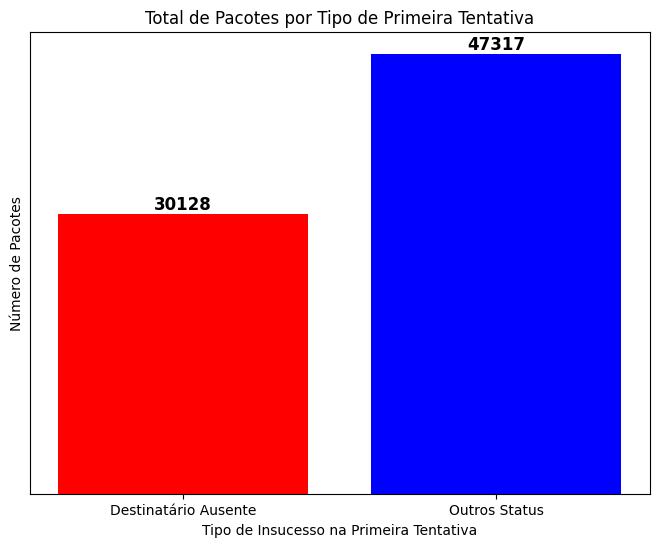

In [5]:
# @title
# Criando os subconjuntos de dados
# Encontrar a menor tentativa para cada pacote
min_tentativa_por_pacote = df_itinerarios_pacotes.groupby('package id')['numero da tentativa'].min()

# Merge para adicionar essa informação ao DataFrame original
df_min_tentativa = df_itinerarios_pacotes.merge(min_tentativa_por_pacote, on='package id', suffixes=('', '_min'))

# Identificar pacotes cuja menor tentativa tem status "Destinatário ausente"
pacotes_com_ausencia_na_primeira_tentativa = df_min_tentativa[
    (df_min_tentativa['numero da tentativa'] == df_min_tentativa['numero da tentativa_min']) &
    (df_min_tentativa['status da tentativa'] == 'Destinatário ausente')
]['package id'].unique()  # Pegamos apenas os IDs desses pacotes

# Selecionar todas as tentativas desses pacotes
df_ausentes = df_itinerarios_pacotes[df_itinerarios_pacotes['package id'].isin(pacotes_com_ausencia_na_primeira_tentativa)]

pacotes_outros_status_primeira_tentativa = df_min_tentativa[
    (df_min_tentativa['numero da tentativa'] == df_min_tentativa['numero da tentativa_min']) &
    (~df_min_tentativa['status da tentativa'].isin(['Destinatário ausente', 'Realizado com sucesso']))
]['package id'].unique()  # Pegamos apenas os IDs desses pacotes

df_outros = df_itinerarios_pacotes[df_itinerarios_pacotes['package id'].isin(pacotes_outros_status_primeira_tentativa)]

# Total de pacotes únicos com primeira tentativa ausente e total de pacotes únicos com primeira tentativa em outros status
print(f"Total de pacotes únicos com primeira tentativa ausente: {len(pacotes_com_ausencia_na_primeira_tentativa)}")
print(f"Total de pacotes únicos com primeira tentativa em outros status: {len(pacotes_outros_status_primeira_tentativa)}")

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Criar o DataFrame com os totais de pacotes por tipo de primeira tentativa
df_pacotes = pd.DataFrame({
    'Tipo': ['Destinatário Ausente', 'Outros Status'],
    'Total de Pacotes': [len(pacotes_com_ausencia_na_primeira_tentativa), len(pacotes_outros_status_primeira_tentativa)]
})

# Criar o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(8, 6))

# Criando as barras
ax.bar(df_pacotes['Tipo'], df_pacotes['Total de Pacotes'], color=['red', 'blue'])

# Adicionando rótulos nas barras
for i, value in enumerate(df_pacotes['Total de Pacotes']):
    ax.text(i, value + 500, str(value), ha='center', fontsize=12, fontweight='bold')

# Configurações do gráfico
ax.set_title('Total de Pacotes por Tipo de Primeira Tentativa')
ax.set_ylabel('Número de Pacotes')
ax.set_xlabel('Tipo de Insucesso na Primeira Tentativa')
ax.set_yticks([])


plt.show()




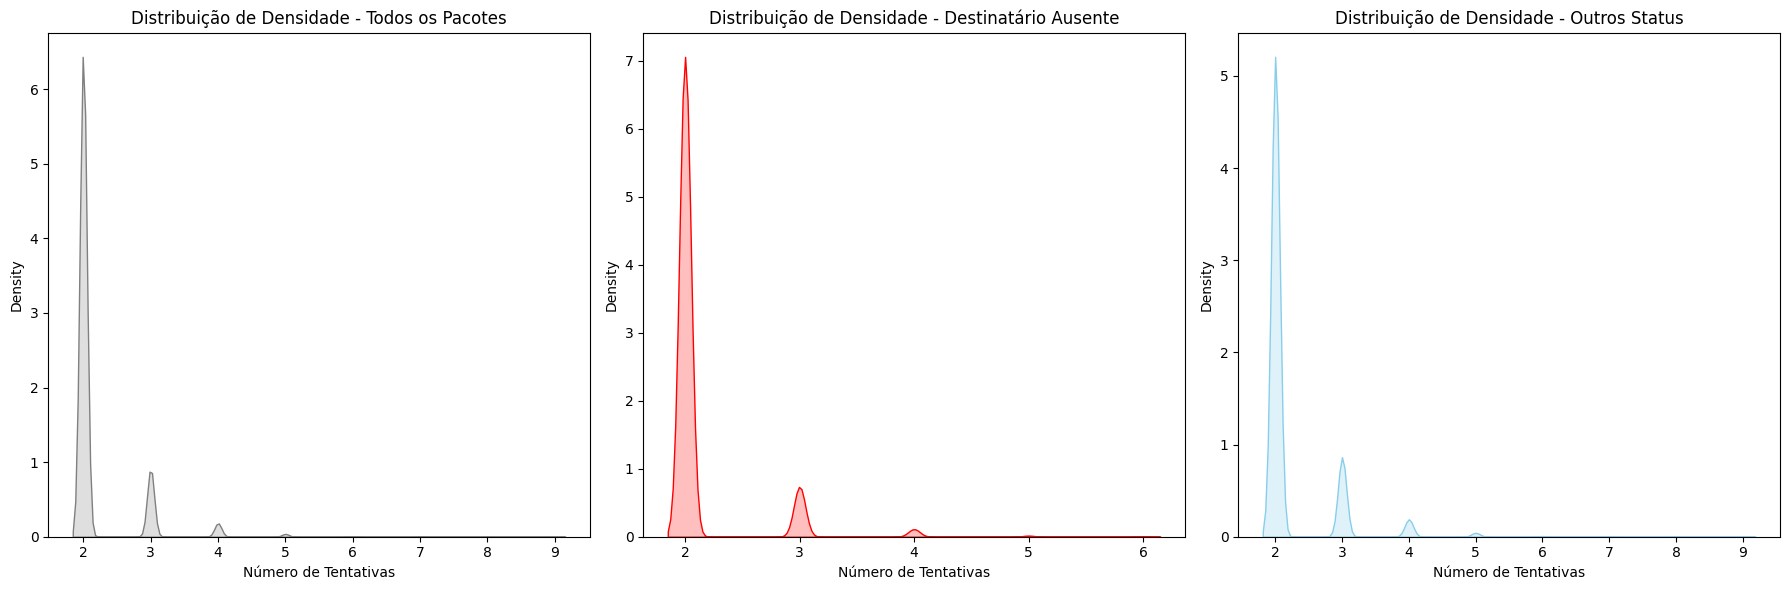

In [6]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Criando a contagem de tentativas de entrega por pacote
tentativas_geral = df_itinerarios_pacotes.groupby('package id')['itinerary id'].count()
tentativas_ausentes = df_ausentes.groupby('package id')['itinerary id'].count()
tentativas_outros = df_outros.groupby('package id')['itinerary id'].count()

tentativas_geral_df = tentativas_geral
tentativas_ausentes_df = tentativas_ausentes
tentativas_outros_df = tentativas_outros

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Convertendo para Série Pandas para evitar erro
tentativas_geral = pd.Series(tentativas_geral.values)
tentativas_ausentes = pd.Series(tentativas_ausentes.values)
tentativas_outros = pd.Series(tentativas_outros.values)

# KDE Plot para todos os pacotes
sns.kdeplot(tentativas_geral, ax=axes[0], color='gray', fill=True)
axes[0].set_title('Distribuição de Densidade - Todos os Pacotes')
axes[0].set_xlabel('Número de Tentativas')

# KDE Plot para destinatário ausente
sns.kdeplot(tentativas_ausentes, ax=axes[1], color='red', fill=True)
axes[1].set_title('Distribuição de Densidade - Destinatário Ausente')
axes[1].set_xlabel('Número de Tentativas')

# KDE Plot para outros status
sns.kdeplot(tentativas_outros, ax=axes[2], color='skyblue', fill=True)
axes[2].set_title('Distribuição de Densidade - Outros Status')
axes[2].set_xlabel('Número de Tentativas')

plt.tight_layout()
plt.show()

* De modo geral, a grande maioria dos pacotes exige duas tentativas de entrega. Poucos passam da terceira.
* Pacotes com "Destinatário ausente" tendem a ter um número limitado de tentativas

  * A distribuição do gráfico vermelho (Destinatário Ausente) desaparece rapidamente após a 3ª ou 4ª tentativa.

* O gráfico azul (Outros Status) tem uma cauda um pouco mais longa do que o gráfico vermelho.
  * Isso indica que falhas não relacionadas ao destinatário ausente podem resultar em mais tentativas antes que o pacote seja considerado um insucesso total.

In [7]:
# @title
# calcular custo total do pacote para cada tipo de insucesso
pacotes_ausencia_custo_total = df_ausentes.groupby('package id')['preco pacote'].sum().reset_index()
pacotes_ausencia_custo_total.rename(columns={'preco pacote': 'custo total do pacote'}, inplace=True)

pacotes_outros_custo_total = df_outros.groupby('package id')['preco pacote'].sum().reset_index()
pacotes_outros_custo_total.rename(columns={'preco pacote': 'custo total do pacote'}, inplace=True)

print(pacotes_ausencia_custo_total)
print(pacotes_outros_custo_total)

       package id  custo total do pacote
0       445789923               1.807248
1       445790050               3.396691
2       445790814               8.107062
3       445790949               5.102185
4       445791078               3.684000
...           ...                    ...
30123   454336006               2.387628
30124   454336014               3.643907
30125   454336049               2.387628
30126   454336124               2.387628
30127   454343359               7.306924

[30128 rows x 2 columns]
       package id  custo total do pacote
0       445789713               6.303729
1       445790254               2.936578
2       445790320               3.608104
3       445790355               5.918182
4       445790403               3.883122
...           ...                    ...
47312   454326967              10.752769
47313   454332475              12.568238
47314   454336120               5.445176
47315   454342441               7.644492
47316   454377853              

In [8]:
# @title
# Calculando custo adicional para cada tipo de insucesso
# Calcular o custo total da primeira tentativa de cada pacote
primeira_tentativa_ausentes = df_ausentes.sort_values(['package id', 'numero da tentativa']).drop_duplicates('package id')
primeira_tentativa_outros = df_outros.sort_values(['package id', 'numero da tentativa']).drop_duplicates('package id')

# Somar os custos apenas da primeira tentativa
custo_primeira_tentativa_ausentes = primeira_tentativa_ausentes.groupby('package id')['preco pacote'].sum().reset_index()
custo_primeira_tentativa_ausentes.rename(columns={'preco pacote': 'custo primeira tentativa'}, inplace=True)

custo_primeira_tentativa_outros = primeira_tentativa_outros.groupby('package id')['preco pacote'].sum().reset_index()
custo_primeira_tentativa_outros.rename(columns={'preco pacote': 'custo primeira tentativa'}, inplace=True)

# Juntar o custo total e o custo da primeira tentativa
df_custo_ausentes = pacotes_ausencia_custo_total.merge(custo_primeira_tentativa_ausentes, on='package id')
df_custo_outros = pacotes_outros_custo_total.merge(custo_primeira_tentativa_outros, on='package id')

# Calcular o custo adicional (custo total - custo da primeira tentativa)
df_custo_ausentes['custo adicional'] = df_custo_ausentes['custo total do pacote'] - df_custo_ausentes['custo primeira tentativa']
df_custo_outros['custo adicional'] = df_custo_outros['custo total do pacote'] - df_custo_outros['custo primeira tentativa']

print(df_custo_ausentes)
print(df_custo_outros)


       package id  custo total do pacote  custo primeira tentativa  \
0       445789923               1.807248                  0.265846   
1       445790050               3.396691                  1.330625   
2       445790814               8.107062                  0.717317   
3       445790949               5.102185                  1.841031   
4       445791078               3.684000                  1.963200   
...           ...                    ...                       ...   
30123   454336006               2.387628                  0.801628   
30124   454336014               3.643907                  1.716465   
30125   454336049               2.387628                  0.801628   
30126   454336124               2.387628                  0.801628   
30127   454343359               7.306924                  3.881591   

       custo adicional  
0             1.541402  
1             2.066066  
2             7.389745  
3             3.261154  
4             1.720800  
...      

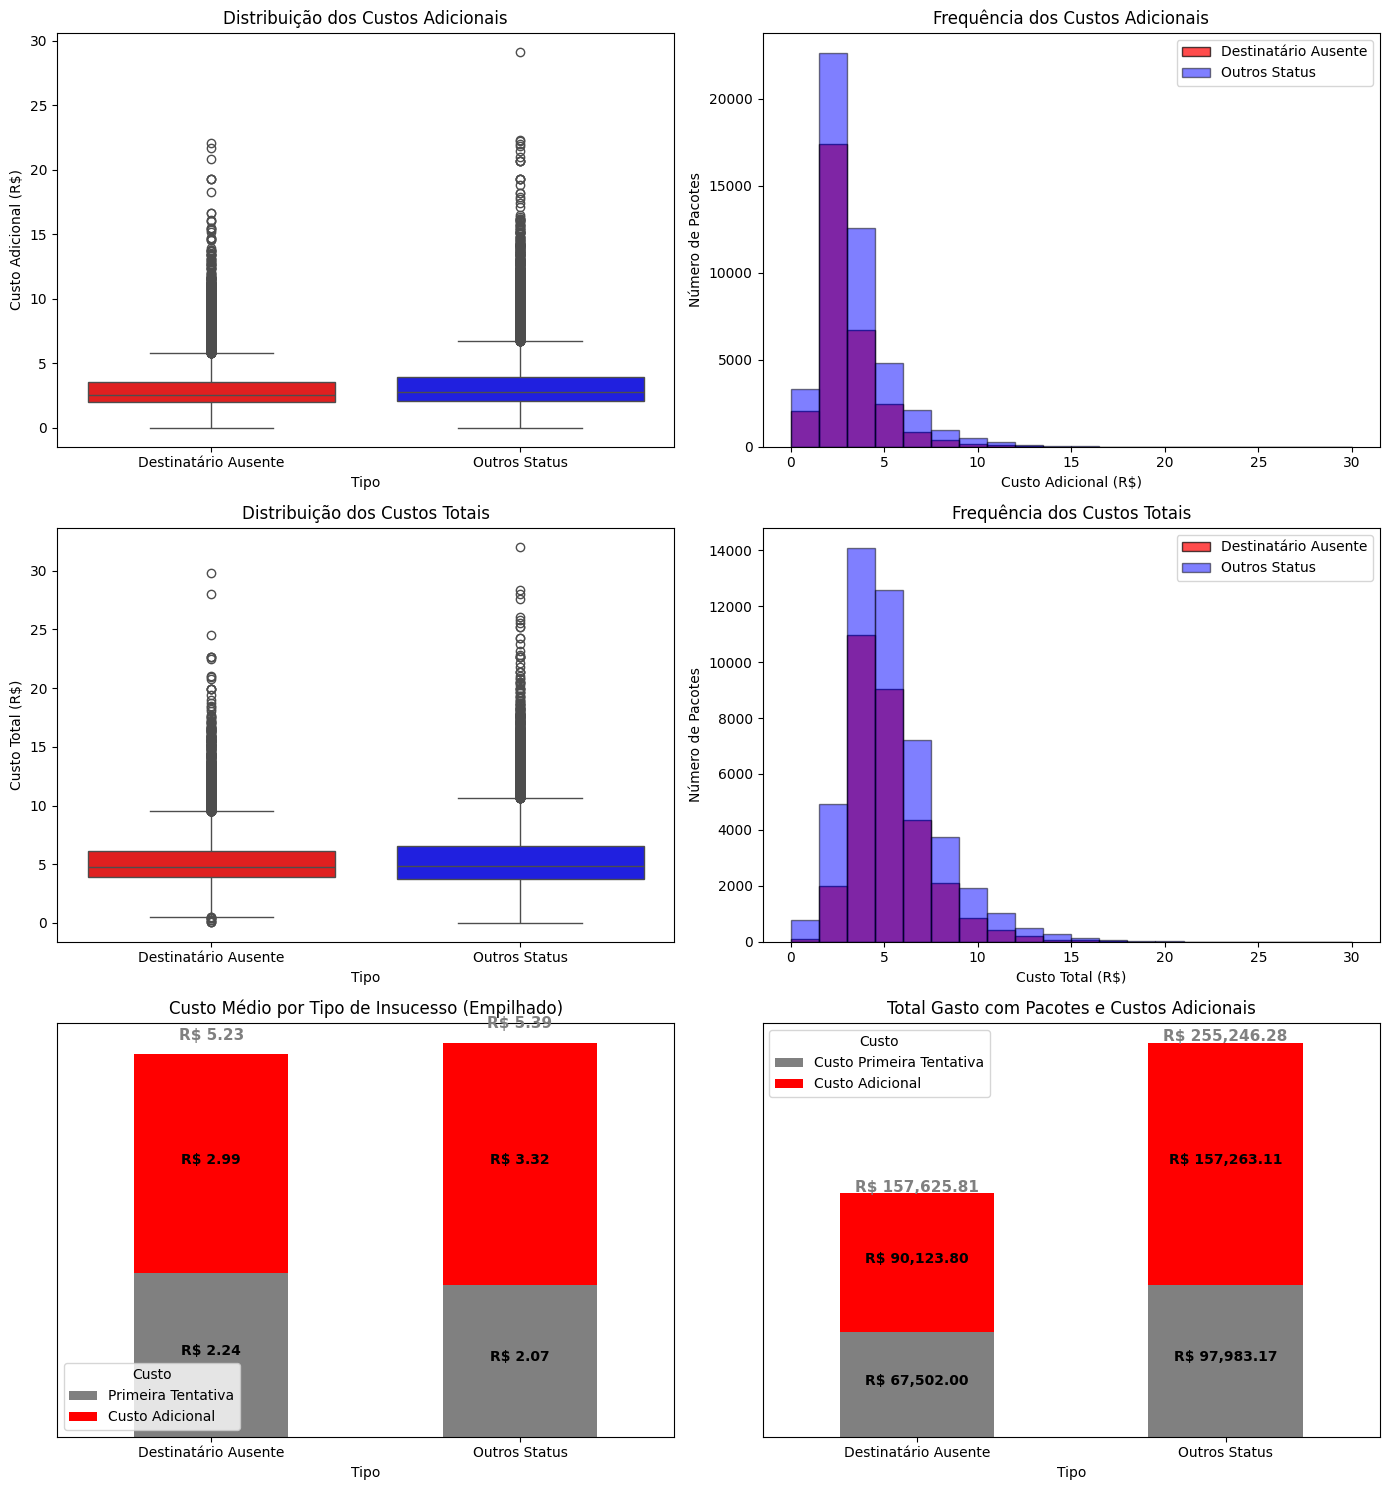

In [9]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Criando um DataFrame para os boxplots e histogramas
df_custo_boxplot = pd.concat([
    df_custo_ausentes.assign(Tipo='Destinatário Ausente'),
    df_custo_outros.assign(Tipo='Outros Status')
])

# Criando a figura para múltiplos gráficos (agora com 3 linhas e 2 colunas)
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# 🔹 1. Boxplot: Distribuição dos Custos Adicionais para ambos os grupos
sns.boxplot(data=df_custo_boxplot, x='Tipo', y='custo adicional', palette=['red', 'blue'], ax=axes[0, 0])
axes[0, 0].set_title('Distribuição dos Custos Adicionais')
axes[0, 0].set_ylabel('Custo Adicional (R$)')

# 🔹 2. Histograma: Frequência dos Custos Adicionais
axes[0, 1].hist(df_custo_ausentes['custo adicional'], bins=20, color='red', alpha=0.7, edgecolor='black', label='Destinatário Ausente', range=(0, 30))
axes[0, 1].hist(df_custo_outros['custo adicional'], bins=20, color='blue', alpha=0.5, edgecolor='black', label='Outros Status', range=(0, 30))
axes[0, 1].set_title('Frequência dos Custos Adicionais')
axes[0, 1].set_xlabel('Custo Adicional (R$)')
axes[0, 1].set_ylabel('Número de Pacotes')
axes[0, 1].legend()

# 🔹 3. Boxplot: Distribuição dos Custos Totais para ambos os grupos
sns.boxplot(data=df_custo_boxplot, x='Tipo', y='custo total do pacote', palette=['red', 'blue'], ax=axes[1, 0])
axes[1, 0].set_title('Distribuição dos Custos Totais')
axes[1, 0].set_ylabel('Custo Total (R$)')

# 🔹 4. Histograma: Frequência dos Custos Totais
axes[1, 1].hist(df_custo_ausentes['custo total do pacote'], bins=20, color='red', alpha=0.7, edgecolor='black', label='Destinatário Ausente', range=(0, 30))
axes[1, 1].hist(df_custo_outros['custo total do pacote'], bins=20, color='blue', alpha=0.5, edgecolor='black', label='Outros Status', range=(0, 30))
axes[1, 1].set_title('Frequência dos Custos Totais')
axes[1, 1].set_xlabel('Custo Total (R$)')
axes[1, 1].set_ylabel('Número de Pacotes')
axes[1, 1].legend()

# 🔹 5. Gráfico de Barras Empilhadas: Custo Médio por Tipo de Insucesso
media_custo = {
    'Tipo': ['Destinatário Ausente', 'Outros Status'],
    'Custo Primeira Tentativa': [
        df_custo_ausentes['custo total do pacote'].mean() - df_custo_ausentes['custo adicional'].mean(),
        df_custo_outros['custo total do pacote'].mean() - df_custo_outros['custo adicional'].mean()
    ],
    'Custo Adicional': [
        df_custo_ausentes['custo adicional'].mean(),
        df_custo_outros['custo adicional'].mean()
    ]
}

df_media_custo = pd.DataFrame(media_custo)

# Criar gráfico de barras empilhadas dentro da mesma figura
bars = df_media_custo.set_index('Tipo').plot(kind='bar', stacked=True, color=['gray', 'red'], ax=axes[2, 0])

# Configurações do gráfico
axes[2, 0].set_title('Custo Médio por Tipo de Insucesso (Empilhado)')
axes[2, 0].set_ylabel('')
axes[2, 0].legend(title="Custo", labels=["Primeira Tentativa", "Custo Adicional"])
axes[2, 0].set_xticklabels(df_media_custo['Tipo'], rotation=0)

# 🔹 Removendo os números do eixo Y
axes[2, 0].set_yticks([])

# 🔹 Adicionando os valores das barras dentro da barra e o total acima
for bar_group in bars.containers:
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:
            axes[2, 0].text(bar.get_x() + bar.get_width()/2, bar.get_y() + height/2,
                            f'R$ {height:.2f}', ha='center', fontsize=10, fontweight='bold', color='black')

# Exibir o valor total acima da barra
for i, total in enumerate(df_media_custo[['Custo Primeira Tentativa', 'Custo Adicional']].sum(axis=1)):
    axes[2, 0].text(i, total + 0.2, f'R$ {total:.2f}', ha='center', fontsize=11, fontweight='bold', color='gray')


# 🔹 6. Gráfico de Barras Empilhadas: Total Gasto com Pacotes e Custos Adicionais
total_custo = {
    'Tipo': ['Destinatário Ausente', 'Outros Status'],
    'Custo Primeira Tentativa': [
        df_custo_ausentes['custo total do pacote'].sum() - df_custo_ausentes['custo adicional'].sum(),
        df_custo_outros['custo total do pacote'].sum() - df_custo_outros['custo adicional'].sum()
    ],
    'Custo Adicional': [
        df_custo_ausentes['custo adicional'].sum(),
        df_custo_outros['custo adicional'].sum()
    ]
}

df_total_custo = pd.DataFrame(total_custo)

# Criar gráfico de barras empilhadas mostrando o total gasto
bars = df_total_custo.set_index('Tipo').plot(kind='bar', stacked=True, color=['gray', 'red'], ax=axes[2, 1])

# Configurações do gráfico
axes[2, 1].set_title('Total Gasto com Pacotes e Custos Adicionais')
axes[2, 1].set_ylabel('')
axes[2, 1].legend(title="Custo", labels=["Custo Primeira Tentativa", "Custo Adicional"])
axes[2, 1].set_xticklabels(df_total_custo['Tipo'], rotation=0)

# 🔹 Removendo os números do eixo Y
axes[2, 1].set_yticks([])

# 🔹 Adicionando os valores das barras dentro da barra e o total acima
for bar_group in bars.containers:
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:
            axes[2, 1].text(bar.get_x() + bar.get_width()/2, bar.get_y() + height/2,
                            f'R$ {height:,.2f}', ha='center', fontsize=10, fontweight='bold', color='black')

# Exibir o valor total acima da barra
for i, total in enumerate(df_total_custo[['Custo Primeira Tentativa', 'Custo Adicional']].sum(axis=1)):
    axes[2, 1].text(i, total + 1000, f'R$ {total:,.2f}', ha='center', fontsize=11, fontweight='bold', color='gray')

# Ajustando layout
plt.tight_layout()
plt.show()


1. Distribuição dos Custos Adicionais (Boxplot e Histograma)
  * A maioria dos custos adicionais está concentrada em valores baixos, mas há outliers significativos, indicando pacotes que tiveram custos extras elevados, possivelmente devido a múltiplas tentativas de entrega.
  * Tanto para Destinatário Ausente quanto para Outros Status, a distribuição é bastante semelhante, com a maioria dos pacotes tendo custos adicionais baixos e alguns poucos com valores elevados.
  * O histograma reforça essa análise, mostrando que a grande maioria dos pacotes teve custos adicionais abaixo de R$ 10, enquanto um pequeno número teve valores mais altos.

2. Distribuição dos Custos Totais (Boxplot e Histograma)
  * O comportamento dos custos totais segue um padrão semelhante ao dos custos adicionais.
  * Assim como nos custos adicionais, a maior parte dos pacotes tem custos totais baixos, mas alguns pacotes apresentam custos totais bastante elevados, provavelmente devido a múltiplas tentativas de entrega.
  * O histograma evidencia essa tendência, mostrando que a maioria dos pacotes tem custo total entre R$ 0 e R$ 10, mas há alguns casos que ultrapassam R$ 25 ou mais.

3. Custo Médio e Total por tipo de insucesso
  * O custo médio dos pacotes para cada tipo de insucesso é bem semelhante, tanto para a primeira tentativa, quanto para as demais, o que pode ser preocupante considerando que pacotes de outros status não deveriam ter novas tentativas de entrega.
  * Os custos totais com pacotes de Outros Status são consideravelmente mais altos do que os com Destinatário Ausente. Como vimos que o custo médio do pacote para os dois tipos de insucesso é semelhante, o custo mais alto na primeira tentativa para Outros Status pode ser explicado pelo volume maior de pacotes na amostra analisada para este tipo de insucesso. No entanto, a proporção de custos adicionais em relação ao custo total para cada tipo de insucesso é diferente: enquanto que eles representam 57% do total para Destinatário Ausente, para Outros Status representam 61%. Isso aparentemente está relacionado a maior quantidade de tentativas de entregas realizadas neste tipo de insucesso, evidenciando que a operação gasta mais nos reenvios destes pacotes do que nos relacionados à ausência de destinatário.


### **Pacotes por embarcador**

In [13]:
# @title
# renomear as colunas Package ID, Company Company Name, Company CNPJ, Company Economic Group
pacotes_embarcador.rename(columns={'Package ID': 'package id', 'Company Company Name': 'embarcador', 'Company CNPJ': 'cnpj', 'Company Economic Group': 'economic group'}, inplace=True)

# manter somente as colunas de interesse
pacotes_embarcador = pacotes_embarcador[['package id', 'embarcador']]

# padronizar o nome dos embarcadores em maiusculo
pacotes_embarcador['embarcador'] = pacotes_embarcador['embarcador'].str.upper()

# fazer merge com df_custo_ausentes e df_custo_outros
pacotes_ausentes_embarcador = df_custo_ausentes.merge(pacotes_embarcador, on='package id')
pacotes_outros_embarcador = df_custo_outros.merge(pacotes_embarcador, on='package id')

pacotes_ausentes_embarcador
pacotes_outros_embarcador

,package id,custo total do pacote,custo primeira tentativa,custo adicional,embarcador
0,445789713,6.303729,2.899467,3.404262,IN GLOW BRASIL INTERMEDIACAO DE NEGOCIOS LTDA
1,445790254,2.936578,2.814746,0.121832,ALPARGATAS S.A.
2,445790320,3.608104,1.769796,1.838308,ENIVIX LTDA
3,445790355,5.918182,2.343182,3.575000,EBAZAR.COM.BR. LTDA
4,445790403,3.883122,2.108929,1.774194,ENIVIX LTDA
...,...,...,...,...,...
47312,454326967,10.752769,5.558667,5.194103,ADIDAS DO BRASIL LTDA
47313,454332475,12.568238,2.821238,9.747000,FM TRANSPORTES E SERVIÇOS LTDA ME
47314,454336120,5.445176,2.148969,3.296207,CONEXAO TRANSPORTES E LOGISTICA LTDA
47315,454342441,7.644492,2.689254,4.955238,ZARA


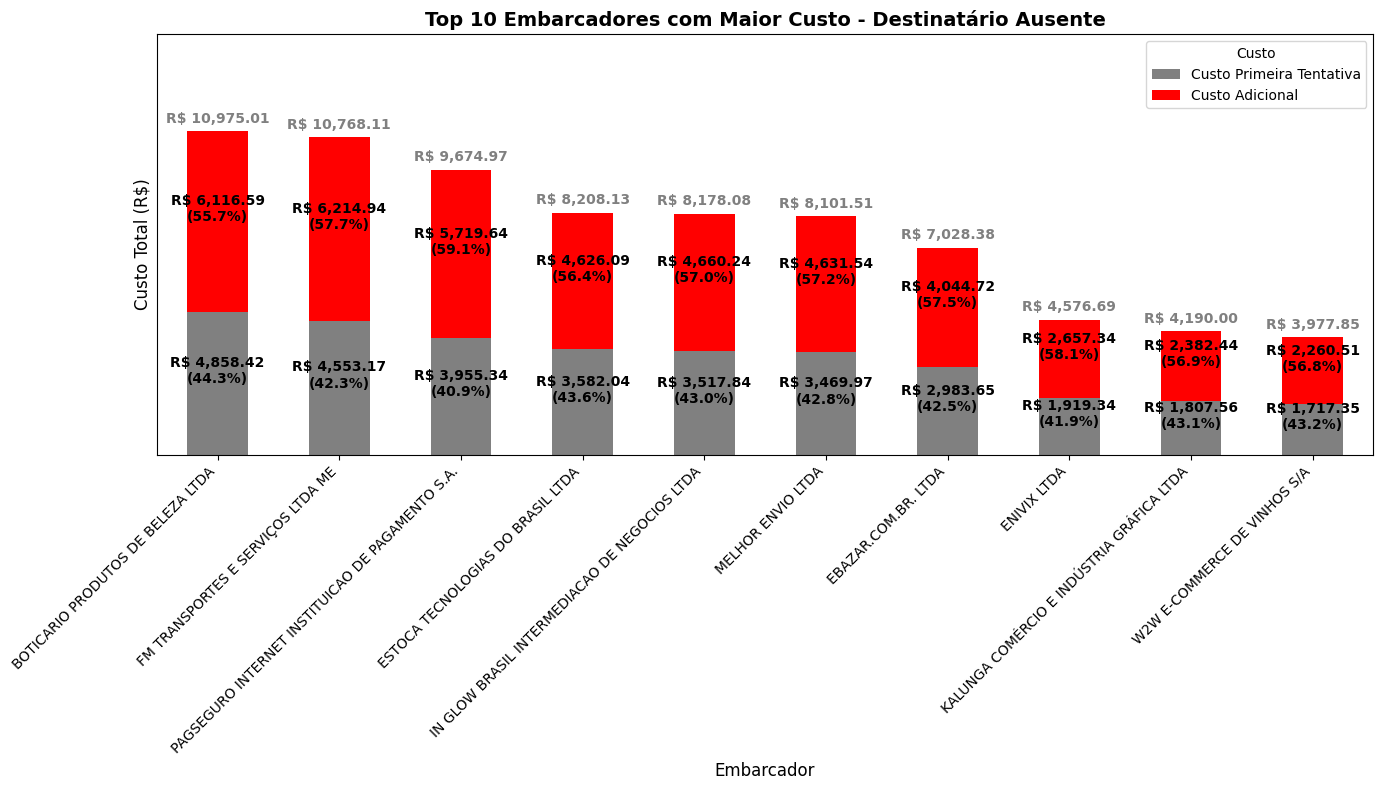

In [19]:
# @title
import matplotlib.pyplot as plt
import pandas as pd

# Agregar dados de custo e pacotes
custo_embarcador_ausente = pacotes_ausentes_embarcador.groupby('embarcador').agg(
    custo_total=('custo total do pacote', 'sum'),
    custo_adicional=('custo adicional', 'sum'),
    total_pacotes=('package id', 'count')  # Contar pacotes
).reset_index()

# Calcular custo da primeira tentativa
custo_embarcador_ausente['custo_primeira_tentativa'] = (
    custo_embarcador_ausente['custo_total'] - custo_embarcador_ausente['custo_adicional']
)

# Selecionar os 10 embarcadores com MAIOR custo total antes do merge
top_embarcadores_ausente = custo_embarcador_ausente.nlargest(10, 'custo_total')

# Criar figura
fig, ax = plt.subplots(figsize=(14, 8))

# Criar gráfico de barras empilhadas
bars = top_embarcadores_ausente.set_index('embarcador')[['custo_primeira_tentativa', 'custo_adicional']].plot(
    kind='bar', stacked=True, color=['gray', 'red'], ax=ax
)

ax.set_title('Top 10 Embarcadores com Maior Custo - Destinatário Ausente', fontsize=14, fontweight='bold')
ax.set_ylabel('Custo Total (R$)', fontsize=12)
ax.set_xlabel('Embarcador', fontsize=12)
ax.legend(title="Custo", labels=["Custo Primeira Tentativa", "Custo Adicional"])
ax.set_xticklabels(top_embarcadores_ausente['embarcador'], rotation=45, ha="right")
ax.yaxis.set_ticks([])

# Ajustar o limite superior do eixo Y
y_max = top_embarcadores_ausente['custo_total'].max() * 1.3
ax.set_ylim(0, y_max)

# 🔹 Adicionando rótulos dentro das barras com valores e porcentagens
for bar, row in zip(bars.containers[0], top_embarcadores_ausente.itertuples()):
    total = row.custo_total
    p1 = row.custo_primeira_tentativa
    p2 = row.custo_adicional

    if total > 0:
        ax.text(bar.get_x() + bar.get_width()/2, p1/2,
                f'R$ {p1:,.2f}\n({p1/total:.1%})', ha='center', fontsize=10, color='black', fontweight='bold')

        ax.text(bar.get_x() + bar.get_width()/2, p1 + (p2 / 2),
                f'R$ {p2:,.2f}\n({p2/total:.1%})', ha='center', fontsize=10, color='black', fontweight='bold')

# 🔹 Adicionando rótulo com o total acima das barras
for idx, row in enumerate(top_embarcadores_ausente.itertuples()):
    ax.text(idx, row.custo_total + (y_max * 0.02), f'R$ {row.custo_total:,.2f}',
            ha='center', fontsize=10, fontweight='bold', color='gray')

# Ajustar layout
plt.tight_layout()
plt.show()


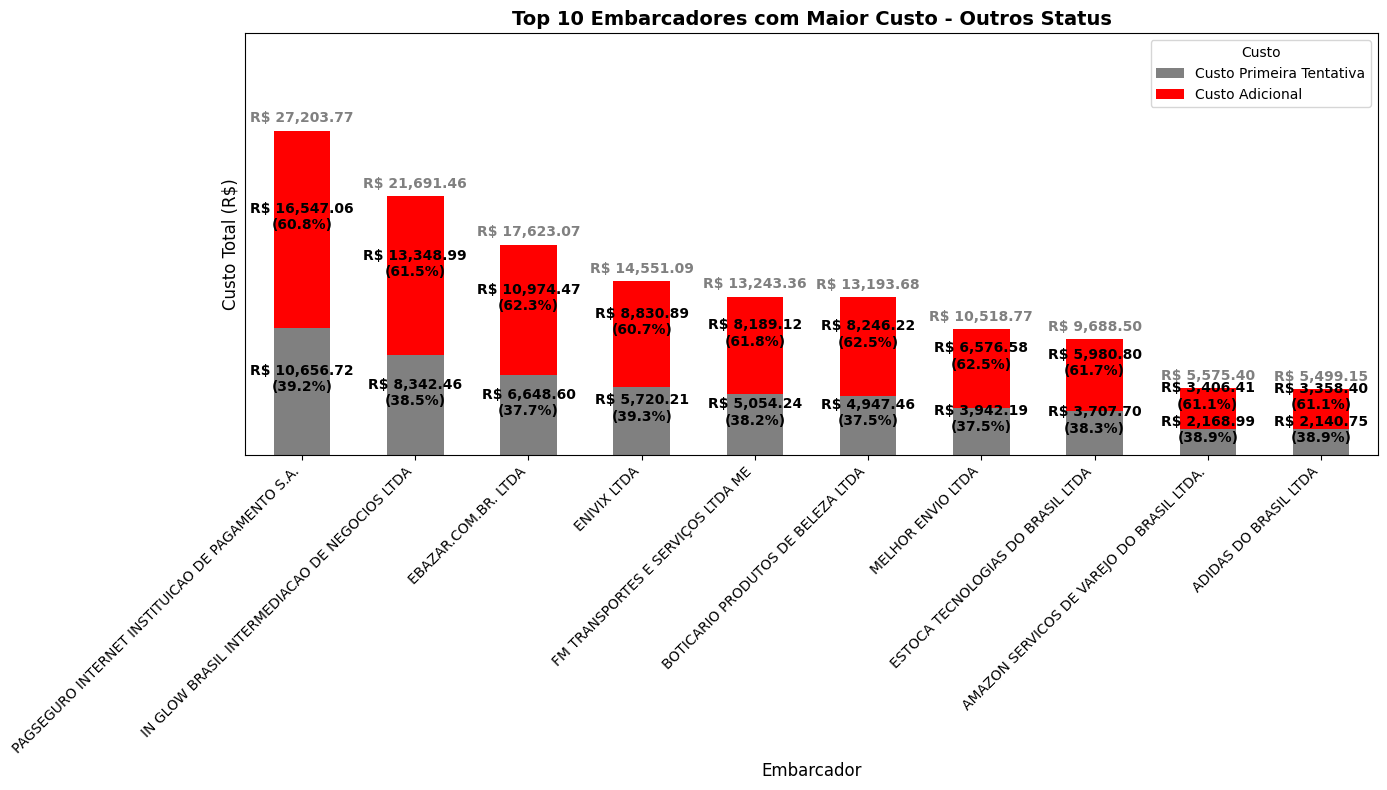

In [20]:
# @title
import matplotlib.pyplot as plt
import pandas as pd

# Agregar dados de custo e pacotes
custo_embarcador_outros = pacotes_outros_embarcador.groupby('embarcador').agg(
    custo_total=('custo total do pacote', 'sum'),
    custo_adicional=('custo adicional', 'sum'),
    total_pacotes=('package id', 'count')  # Contar pacotes
).reset_index()

# Calcular custo da primeira tentativa
custo_embarcador_outros['custo_primeira_tentativa'] = (
    custo_embarcador_outros['custo_total'] - custo_embarcador_outros['custo_adicional']
)

# Selecionar os 10 embarcadores com MAIOR custo total antes do merge
top_embarcadores_outros = custo_embarcador_outros.nlargest(10, 'custo_total')

# Criar figura
fig, ax = plt.subplots(figsize=(14, 8))

# Criar gráfico de barras empilhadas
bars = top_embarcadores_outros.set_index('embarcador')[['custo_primeira_tentativa', 'custo_adicional']].plot(
    kind='bar', stacked=True, color=['gray', 'red'], ax=ax
)

ax.set_title('Top 10 Embarcadores com Maior Custo - Outros Status', fontsize=14, fontweight='bold')
ax.set_ylabel('Custo Total (R$)', fontsize=12)
ax.set_xlabel('Embarcador', fontsize=12)
ax.legend(title="Custo", labels=["Custo Primeira Tentativa", "Custo Adicional"])
ax.set_xticklabels(top_embarcadores_outros['embarcador'], rotation=45, ha="right")
ax.yaxis.set_ticks([])

# Ajustar o limite superior do eixo Y
y_max = top_embarcadores_outros['custo_total'].max() * 1.3
ax.set_ylim(0, y_max)

# 🔹 Adicionando rótulos dentro das barras com valores e porcentagens
for bar, row in zip(bars.containers[0], top_embarcadores_outros.itertuples()):
    total = row.custo_total
    p1 = row.custo_primeira_tentativa
    p2 = row.custo_adicional

    if total > 0:
        ax.text(bar.get_x() + bar.get_width()/2, p1/2,
                f'R$ {p1:,.2f}\n({p1/total:.1%})', ha='center', fontsize=10, color='black', fontweight='bold')

        ax.text(bar.get_x() + bar.get_width()/2, p1 + (p2 / 2),
                f'R$ {p2:,.2f}\n({p2/total:.1%})', ha='center', fontsize=10, color='black', fontweight='bold')

# 🔹 Adicionando rótulo com o total acima das barras
for idx, row in enumerate(top_embarcadores_outros.itertuples()):
    ax.text(idx, row.custo_total + (y_max * 0.02), f'R$ {row.custo_total:,.2f}',
            ha='center', fontsize=10, fontweight='bold', color='gray')

# Ajustar layout
plt.tight_layout()
plt.show()


* A proporção de custos adicionais em relação ao total de custos é semelhante em todos os Top 10 embarcadores de Destinatário Ausente. O mesmo ocorre para os de outros status, indicando uma semelhança na distribuição de custos de entrega entre todos os embarcadores.
* Empresas como ENIVIX, Melhor Envio, Estoca, O Boticário, PagSeguro, IN Glow e EBAZAR aparecem nos dois gráficos, indicando altas recorrências em tentativas de entrega, independentemente do tipo de insucesso.
* IN Glow, EBAZAR, O Boticário, ENIVIX, Melhor Envio e Estoca tem uma proporção maior de custos relativos a Outros Status em relação ao custo total do que em Dest. Ausente, indicando que este custo elevado pode estar relacionado a maior quantidade de tentativas de entrega neste tipo de insucesso, não apenas ao maior volume de pacotes. Por outro lado, PAgSeguro apresenta uma distribuição de custos entre os tipos de insucesso semelhante, o que indica que a variação presente entre Outros Status e Destinatário Ausente pode ser devido ao maior volume de pacotes do primeiro.

**Pacotes por LMC**

In [22]:
# @title
# renomear as colunas Package ID,Package Planned DC Routing Code,Planned Distribution Center Name,Package Last Mile Company Name
pacotes_base = pacotes_base.rename(columns={'Package ID': 'package id', 'Package Planned DC Routing Code': 'routing code', 'Planned Distribution Center Name': 'base', 'Package Last Mile Company Name': 'last mile company name'})

# manter somente as colunas de interesse, concatenando base e routing code em uma só coluna
pacotes_base['base'] = pacotes_base['base'].astype(str) + ' - ' + pacotes_base['routing code'].astype(str)
pacotes_base = pacotes_base[['package id', 'base']]

# fazer merge com df_custo_ausentes e df_custo_outros
pacotes_ausentes_base = df_custo_ausentes.merge(pacotes_base, on='package id')
pacotes_outros_base = df_custo_outros.merge(pacotes_base, on='package id')

pacotes_ausentes_base
pacotes_outros_base


,package id,custo total do pacote,custo primeira tentativa,custo adicional,base
0,445789713,6.303729,2.899467,3.404262,Ribeirão Preto - Parque Industrial Lagoinha - LAG
1,445790254,2.936578,2.814746,0.121832,Bauru - Vila Engler - BRU
2,445790320,3.608104,1.769796,1.838308,Praia Grande - Vila Guilhermina / SP - PPG
3,445790355,5.918182,2.343182,3.575000,Recife - Imbiribeira - IMB
4,445790403,3.883122,2.108929,1.774194,Vitoria - Vila Velha - VVL
...,...,...,...,...,...
47312,454326967,10.752769,5.558667,5.194103,São Paulo - Taboão da Serra - TBS
47313,454332475,12.568238,2.821238,9.747000,São Paulo - Diadema - DDM
47314,454336120,5.445176,2.148969,3.296207,São Paulo - Diadema - DDM
47315,454342441,7.644492,2.689254,4.955238,Sao Paulo - Guarulhos 3 - GL3


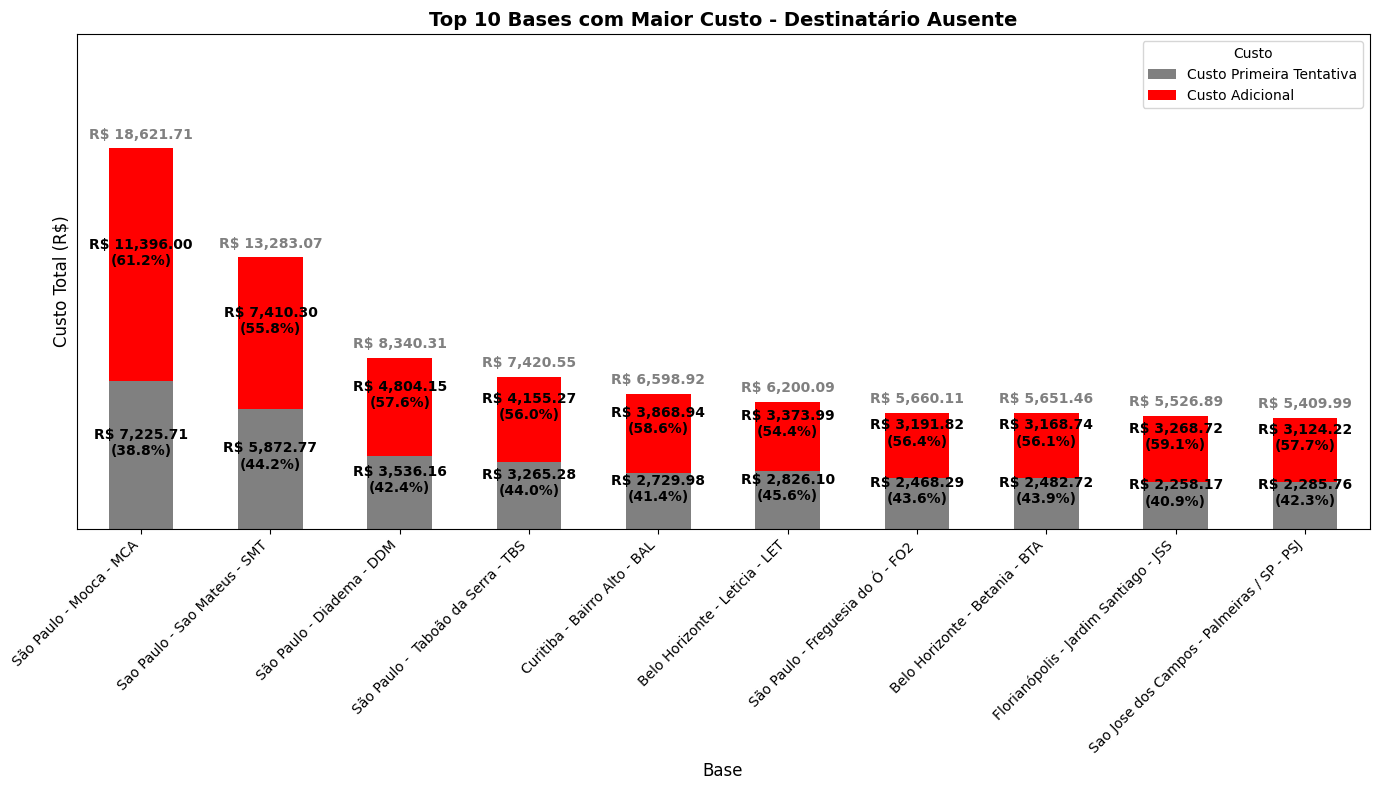

In [24]:
# @title
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar os dados por base e calcular os custos totais e adicionais
custo_base_ausente = pacotes_ausentes_base.groupby('base').agg({
    'custo total do pacote': 'sum',
    'custo adicional': 'sum',
    'package id': 'count'  # Contar o número total de pacotes
}).reset_index()

# Calcular o custo da primeira tentativa (Custo Total - Custo Adicional)
custo_base_ausente['custo primeira tentativa'] = (
    custo_base_ausente['custo total do pacote'] - custo_base_ausente['custo adicional']
)

# Selecionar as 10 bases com MAIOR custo total
top_bases_ausente = custo_base_ausente.nlargest(10, 'custo total do pacote')

# Criar figura com tamanho adequado
fig, ax = plt.subplots(figsize=(14, 8))

# Criar gráfico de barras empilhadas
bars = top_bases_ausente.set_index('base')[['custo primeira tentativa', 'custo adicional']].plot(
    kind='bar', stacked=True, color=['gray', 'red'], ax=ax
)

ax.set_title('Top 10 Bases com Maior Custo - Destinatário Ausente', fontsize=14, fontweight='bold')
ax.set_ylabel('Custo Total (R$)', fontsize=12)
ax.set_xlabel('Base', fontsize=12)
ax.legend(title="Custo", labels=["Custo Primeira Tentativa", "Custo Adicional"])
ax.set_xticklabels(top_bases_ausente['base'], rotation=45, ha="right")
ax.yaxis.set_ticks([])

# Ajustar o limite superior do eixo Y para acomodar os rótulos
y_max = top_bases_ausente['custo total do pacote'].max() * 1.3
ax.set_ylim(0, y_max)

# 🔹 Adicionando rótulos dentro das barras com valores e porcentagens
for bar_group, col_name in zip(bars.containers, ['custo primeira tentativa', 'custo adicional']):
    for bar, (_, row) in zip(bar_group, top_bases_ausente.iterrows()):
        height = bar.get_height()
        if height > 0:
            percent = (height / row['custo total do pacote']) * 100  # Cálculo da porcentagem
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_y() + height/2,
                    f'R$ {height:,.2f}\n({percent:.1f}%)',  # Valor + porcentagem
                    ha='center', fontsize=10, color='black', fontweight='bold')

# 🔹 Adicionando rótulo com o total acima das barras
for idx, row in enumerate(top_bases_ausente.itertuples()):
    total = row._2  # Acessando 'custo total do pacote' corretamente
    ax.text(idx, total + (y_max * 0.02), f'R$ {total:,.2f}',
            ha='center', fontsize=10, fontweight='bold', color='gray')

# 🔹 Ajustar layout para melhor visualização
plt.tight_layout()
plt.show()


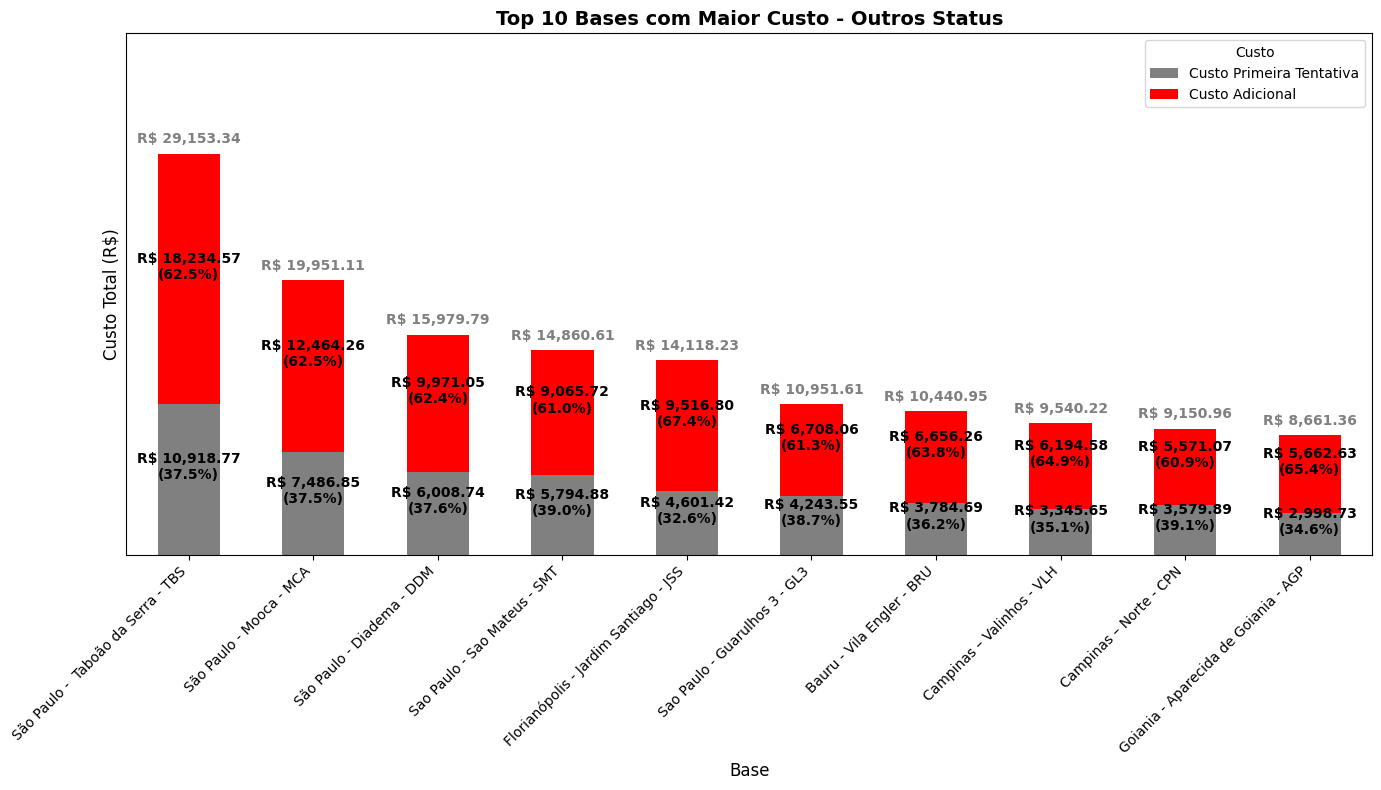

In [25]:
# @title
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar os dados por base e calcular os custos totais e adicionais
custo_base_outros = pacotes_outros_base.groupby('base').agg({
    'custo total do pacote': 'sum',
    'custo adicional': 'sum',
    'package id': 'count'  # Contar o número total de pacotes
}).reset_index()

# Calcular o custo da primeira tentativa (Custo Total - Custo Adicional)
custo_base_outros['custo primeira tentativa'] = (
    custo_base_outros['custo total do pacote'] - custo_base_outros['custo adicional']
)

# Selecionar as 10 bases com MAIOR custo total
top_bases_outros = custo_base_outros.nlargest(10, 'custo total do pacote')

# Criar figura com tamanho adequado
fig, ax = plt.subplots(figsize=(14, 8))

# Criar gráfico de barras empilhadas
bars = top_bases_outros.set_index('base')[['custo primeira tentativa', 'custo adicional']].plot(
    kind='bar', stacked=True, color=['gray', 'red'], ax=ax
)

ax.set_title('Top 10 Bases com Maior Custo - Outros Status', fontsize=14, fontweight='bold')
ax.set_ylabel('Custo Total (R$)', fontsize=12)
ax.set_xlabel('Base', fontsize=12)
ax.legend(title="Custo", labels=["Custo Primeira Tentativa", "Custo Adicional"])
ax.set_xticklabels(top_bases_outros['base'], rotation=45, ha="right")
ax.yaxis.set_ticks([])

# Ajustar o limite superior do eixo Y para acomodar os rótulos
y_max = top_bases_outros['custo total do pacote'].max() * 1.3
ax.set_ylim(0, y_max)

# 🔹 Adicionando rótulos dentro das barras com valores e porcentagens
for bar_group, col_name in zip(bars.containers, ['custo primeira tentativa', 'custo adicional']):
    for bar, (_, row) in zip(bar_group, top_bases_outros.iterrows()):
        height = bar.get_height()
        if height > 0:
            percent = (height / row['custo total do pacote']) * 100  # Cálculo da porcentagem
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_y() + height/2,
                    f'R$ {height:,.2f}\n({percent:.1f}%)',  # Valor + porcentagem
                    ha='center', fontsize=10, color='black', fontweight='bold')

# 🔹 Adicionando rótulo com o total acima das barras
for idx, row in enumerate(top_bases_outros.itertuples()):
    total = row._2  # Acessando 'custo total do pacote' corretamente
    ax.text(idx, total + (y_max * 0.02), f'R$ {total:,.2f}',
            ha='center', fontsize=10, fontweight='bold', color='gray')

# 🔹 Ajustar layout para melhor visualização
plt.tight_layout()
plt.show()


* As bases TBS, MCA, DDM e SMT são as top 4 bases em ambos os gráficos, mostrando a consistência entre elas em relação aos custos com insucessos de entrega, independente do tipo de insucesso.
* No gráfico de Dest. Ausente, a agência MCA se destaca pela maior proporção de custo adicional em relação ao custo total se comparada a outras bases, chegando a compor 61% do total. Outras bases possuem proporções próximas entre custo adicional/custo primeira tentativa.
* No gráfico de Outros Status, o destaque fica para TBS, que gastou muito a mais com insucessos em relação a outras bases.
* Enquanto MCA manteve a proporção de custos para primeira e demais tentativas de entrega entre os dois tipos de insucesso, TBS, DDM e SMT gastaram proporcionalmente mais com custos adicionais em Outros Status, indicando provavelmente mais tentativas de entrega realizadas nestas categorias do que destinatários ausentes.

**Impactos na Receita Líquida**

In [28]:
# @title
# renomeando as colunas Package ID,Package # Confirmed Packages,Package # Deliverable Packages,Package R$ Total Gross Revenue
receita_pacotes = receita_pacotes.rename(columns={'Package ID': 'package id', 'Package # Confirmed Packages': 'pacotes confirmados', 'Package # Deliverable Packages': 'pacotes entregues', 'Package R$ Total Gross Revenue': 'receita total'})

# selecionando as colunas de interesse
receita_pacotes = receita_pacotes[['package id', 'receita total']]

# criando coluna com receita líquida, considerando taxas de 15%
receita_pacotes['receita líquida'] = receita_pacotes['receita total'] * 0.85

# merge entre os dataframes de custos ausentes e outros com receita líquida
df_custo_ausentes_liq = df_custo_ausentes.merge(receita_pacotes, on='package id')
df_custo_outros_liq = df_custo_outros.merge(receita_pacotes, on='package id')

df_custo_ausentes_liq

,package id,custo total do pacote,custo primeira tentativa,custo adicional,receita total,receita líquida
0,445789923,1.807248,0.265846,1.541402,6.580000,5.593000
1,445790050,3.396691,1.330625,2.066066,10.550000,8.967500
2,445790814,8.107062,0.717317,7.389745,11.670000,9.919500
3,445790949,5.102185,1.841031,3.261154,6.930000,5.890500
4,445791078,3.684000,1.963200,1.720800,9.180000,7.803000
...,...,...,...,...,...,...
30123,454336006,2.387628,0.801628,1.586000,14.559999,12.375999
30124,454336014,3.643907,1.716465,1.927442,16.090000,13.676500
30125,454336049,2.387628,0.801628,1.586000,10.090000,8.576500
30126,454336124,2.387628,0.801628,1.586000,17.940000,15.249000


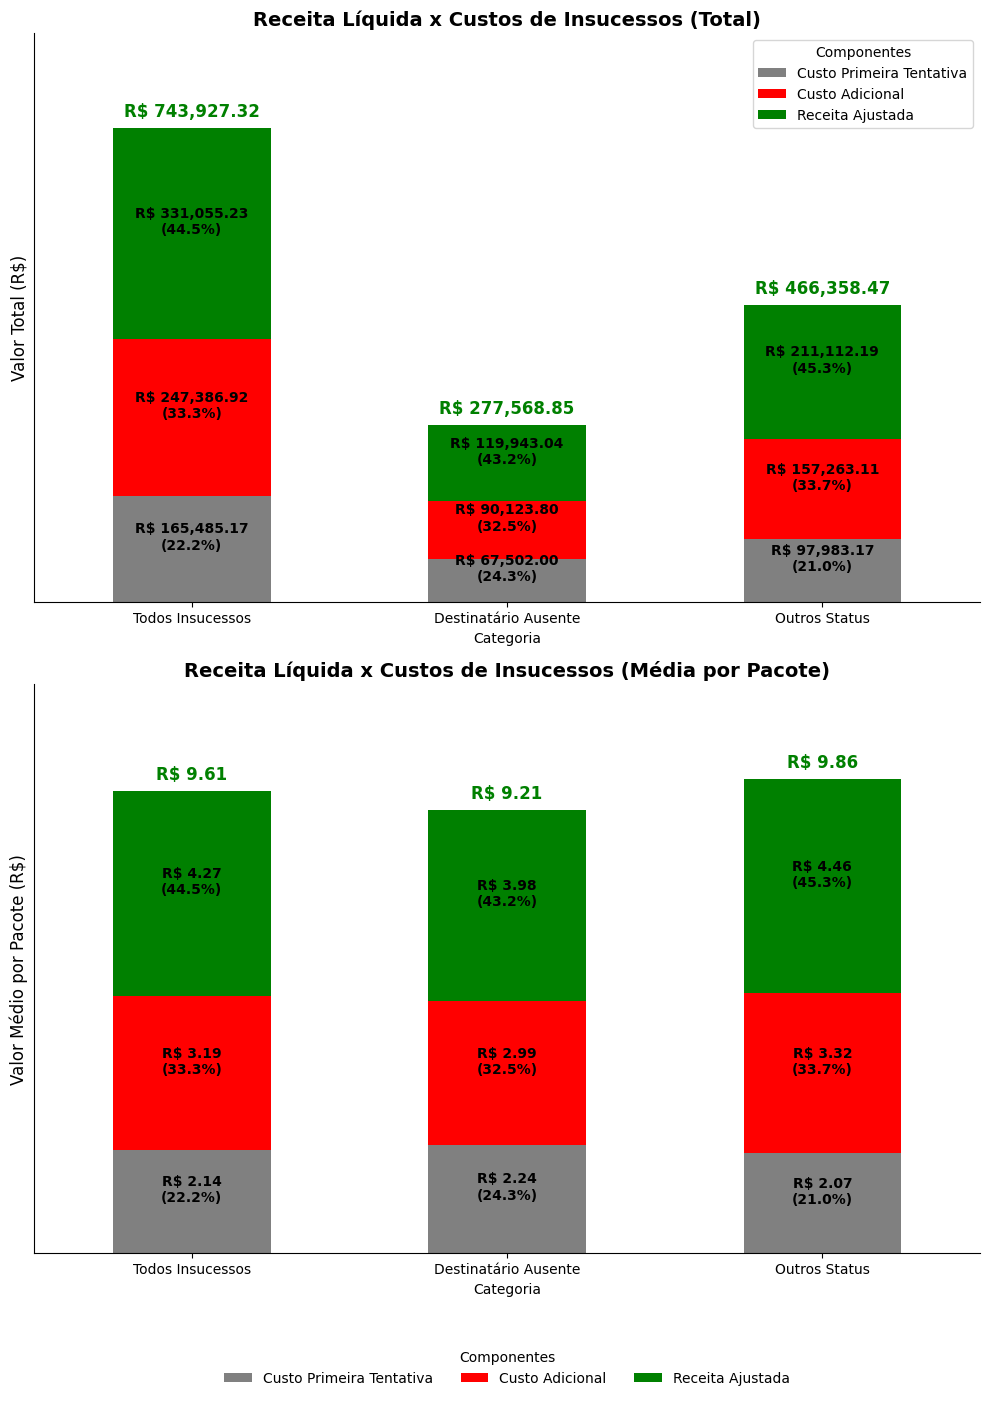

In [49]:
# @title
import matplotlib.pyplot as plt
import pandas as pd

# 🔹 Criar o DataFrame Geral mesclando os dois DataFrames de insucesso
df_custo_geral_liq = pd.concat([df_custo_ausentes_liq, df_custo_outros_liq], ignore_index=True)

# 🔹 Criar DataFrame agregado com a soma total das receitas e custos
df_aggregated = pd.DataFrame({
    "Categoria": ["Todos Insucessos", "Destinatário Ausente", "Outros Status"],
    "Custo Primeira Tentativa": [
        df_custo_geral_liq["custo primeira tentativa"].sum(),
        df_custo_ausentes_liq["custo primeira tentativa"].sum(),
        df_custo_outros_liq["custo primeira tentativa"].sum()
    ],
    "Custo Adicional": [
        df_custo_geral_liq["custo adicional"].sum(),
        df_custo_ausentes_liq["custo adicional"].sum(),
        df_custo_outros_liq["custo adicional"].sum()
    ],
    "Receita Líquida": [
        df_custo_geral_liq["receita líquida"].sum(),
        df_custo_ausentes_liq["receita líquida"].sum(),
        df_custo_outros_liq["receita líquida"].sum()
    ],
    "Total Pacotes": [
        len(df_custo_geral_liq),
        len(df_custo_ausentes_liq),
        len(df_custo_outros_liq)
    ]
})

# 🔹 Criar versão média (valores médios por pacote)
df_aggregated_media = df_aggregated.copy()
df_aggregated_media["Custo Primeira Tentativa"] /= df_aggregated_media["Total Pacotes"]
df_aggregated_media["Custo Adicional"] /= df_aggregated_media["Total Pacotes"]
df_aggregated_media["Receita Líquida"] /= df_aggregated_media["Total Pacotes"]
df_aggregated_media["Receita Ajustada"] = df_aggregated_media["Receita Líquida"] - df_aggregated_media["Custo Primeira Tentativa"] - df_aggregated_media["Custo Adicional"]

# 🔹 Ajustar os custos para que a soma da barra seja igual à receita líquida
df_aggregated["Receita Ajustada"] = df_aggregated["Receita Líquida"] - df_aggregated["Custo Primeira Tentativa"] - df_aggregated["Custo Adicional"]

# 🔹 Criar figura com dois gráficos um abaixo do outro
fig, axes = plt.subplots(2, 1, figsize=(10, 14))

# 🔹 Função para remover bordas indesejadas
def formatar_grafico(ax):
    ax.spines['top'].set_visible(False)     # Remove borda superior
    ax.spines['right'].set_visible(False)   # Remove borda direita

# 🔹 Gráfico 1: Valores Totais
df_aggregated.set_index("Categoria")[["Custo Primeira Tentativa", "Custo Adicional", "Receita Ajustada"]].plot(
    kind="bar", stacked=True, color=['gray', 'red', 'green'], ax=axes[0]
)

axes[0].set_title('Receita Líquida x Custos de Insucessos (Total)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Valor Total (R$)', fontsize=12)
axes[0].legend(title="Componentes", labels=["Custo Primeira Tentativa", "Custo Adicional", "Receita Ajustada"], loc='upper right')
axes[0].set_xticklabels(df_aggregated['Categoria'], rotation=0)
axes[0].yaxis.set_ticks([])

y_max_total = df_aggregated["Receita Líquida"].max() * 1.2
axes[0].set_ylim(0, y_max_total)

# 🔹 Adicionando rótulos dentro das barras (Totais)
for bar_group, col_name in zip(axes[0].containers, ["Custo Primeira Tentativa", "Custo Adicional", "Receita Ajustada"]):
    for bar, (_, row) in zip(bar_group, df_aggregated.iterrows()):
        height = bar.get_height()
        if height > 0:
            percentage = (height / row["Receita Líquida"]) * 100
            axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_y() + height/2,
                         f'R$ {height:,.2f}\n({percentage:.1f}%)', ha='center', fontsize=10, color='black', fontweight='bold')

# 🔹 Adicionando rótulos com os valores totais de Receita Líquida acima das barras
for idx, row in enumerate(df_aggregated.itertuples()):
    total_receita = row._4  # Acessando 'Receita Líquida' corretamente
    axes[0].text(idx, total_receita + (y_max_total * 0.02), f'R$ {total_receita:,.2f}',
                 ha='center', fontsize=12, fontweight='bold', color='green')

# 🔹 Formatar bordas do primeiro gráfico
formatar_grafico(axes[0])

# 🔹 Gráfico 2: Valores Médios por Pacote
df_aggregated_media.set_index("Categoria")[["Custo Primeira Tentativa", "Custo Adicional", "Receita Ajustada"]].plot(
    kind="bar", stacked=True, color=['gray', 'red', 'green'], ax=axes[1]
)

axes[1].set_title('Receita Líquida x Custos de Insucessos (Média por Pacote)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Valor Médio por Pacote (R$)', fontsize=12)
axes[1].set_xticklabels(df_aggregated_media['Categoria'], rotation=0)
axes[1].yaxis.set_ticks([])

y_max_media = df_aggregated_media["Receita Líquida"].max() * 1.2
axes[1].set_ylim(0, y_max_media)

# 🔹 Adicionando rótulos dentro das barras (Médias)
for bar_group, col_name in zip(axes[1].containers, ["Custo Primeira Tentativa", "Custo Adicional", "Receita Ajustada"]):
    for bar, (_, row) in zip(bar_group, df_aggregated_media.iterrows()):
        height = bar.get_height()
        if height > 0:
            percentage = (height / row["Receita Líquida"]) * 100
            axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_y() + height/2,
                         f'R$ {height:,.2f}\n({percentage:.1f}%)', ha='center', fontsize=10, color='black', fontweight='bold')

# 🔹 Adicionando rótulos com os valores médios de Receita Líquida acima das barras
for idx, row in enumerate(df_aggregated_media.itertuples()):
    total_receita_media = row._4  # Acessando 'Receita Líquida' corretamente
    axes[1].text(idx, total_receita_media + (y_max_media * 0.02), f'R$ {total_receita_media:,.2f}',
                 ha='center', fontsize=12, fontweight='bold', color='green')

# 🔹 Formatar bordas do segundo gráfico
formatar_grafico(axes[1])

# 🔹 Mover a legenda do segundo gráfico para fora da área do gráfico
axes[1].legend(title="Componentes", labels=["Custo Primeira Tentativa", "Custo Adicional", "Receita Ajustada"],
               loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, frameon=False)

# 🔹 Ajustar layout para melhor visualização
plt.tight_layout()
plt.show()


* Embora, como visto anteriormente, os custos com novas tentativas de entrega para pacotes com Outros Status constituam uma maior proporção dos custos totais destes pacotes, se comparados aos de Destinatário Ausente, os gráficos aqui evidenciam um consumo semelhante destes custos adicionais da receita líquida obtida. Observando os gráficos de médias, vemos que a receita obtida com os pacotes de Outros Status é maior, o que pode explicar o menor impacto dos custos adicionais neste tipo de insucesso.
* Aproximadamente 1/3 da receita líquida dos pacotes é consumida nos insucessos, graças aos custos adicionais. No caso de Destinatários Ausentes, o protocolo de até 3 tentativas de entrega aparentemente é seguido na maior parte dos casos, porém, teoricamente, os Outros Status não deveriam ter mais tentativas de entrega após o insucesso da primeira tentativa e, ainda assim, são feitas diversas tentativas a ponto de os custos serem equiparados com os de Destinatários Ausentes e consumirem a mesma fatia da Receita.